In [4]:
# Get resources
import numpy as np
import sys
sys.path.append('../../../../Programs/MieStuff/Code - sspstuff/ssp_pmom_pcode/')
import pmomstuff4 as pm
import moms

In [5]:
%matplotlib notebook

In [6]:
# Get filenames -- make sure to change temperature in file names as necessary
#filename =    "../../../../Data/BL_hybrid_CRIs/hybrid_BL_273/ssp_getpsd_T273_S331.txt"
#outfilename = "../../../../Data/BL_hybrid_CRIs/hybrid_BL_273/ssp_getpsd_T273_S331_pmom.nc"
filename = "ssp_getpsd_T240_S331.txt"
outfilename = "ssp_getpsd_T240_S331_pmom.nc"

In [7]:
def getfirstnum(line):
    # Interprets the first non-blank field in a character string as a number
    return int(line.split()[0])

In [8]:
# This is hardwired length of the psd file
Nfrompsd = 13;

# Open the file  
fid = open(filename,'r');

# First two lines are comment
line = fid.readline(); #print line
line = fid.readline(); #print line

# Number of data lines (#wavelengths times #radii)
line = fid.readline(); #print line
Nlines=getfirstnum(line); #print Nlines

# Number of phase function angles
line = fid.readline(); #print line
NANG=getfirstnum(line)

# Another comment line
line = fid.readline();

# Phase angles
line = fid.readline(); #print line.split()
cvalues = np.array(line.split())
ppa = cvalues.astype(float); #print ppa

# Read the last commented line
line = fid.readline();

# Preallocate the straight Pnrm and iops arrays
Pnrm_psd_straight = np.zeros((NANG,Nlines));
iops_psd_straight = np.zeros((Nfrompsd,Nlines));
Ntot = NANG+Nfrompsd;
    
# Get all the data
for iline in range(Nlines):
    line = fid.readline();
    cvalues = np.array(line.split())
    dline = cvalues.astype(float);
    iops_psd_straight[:,iline] = dline[0:Nfrompsd];
    Pnrm_psd_straight[:,iline] = dline[Nfrompsd:Ntot];

# Extract the wavelengths
wave = iops_psd_straight[0,:];

# Now sort out how many radii there are
Nreff = np.argwhere(np.diff(wave)!=0)[0][0] + 1; #print 'Nreff', Nreff
NIORS = int(round(Nlines/Nreff)); #print 'NIORS', NIORS

# Quality control
if Nreff*NIORS != Nlines:
    print ('Bad indexing in SSP2MOM')
else:
     print ('SSP2MOM indexing passed QC')   

# Close the file
fid.close();

SSP2MOM indexing passed QC


In [9]:
# Other parameters
print (NANG, NIORS, Nreff, Nfrompsd, ppa.shape)

# Quality control
print (Pnrm_psd_straight.shape)
print (iops_psd_straight.shape)

281 4017 40 13 (281,)
(281, 160680)
(13, 160680)


In [10]:
Pnrm_psd = Pnrm_psd_straight.reshape(NANG,NIORS,Nreff)
print (Pnrm_psd.shape)

(281, 4017, 40)


In [11]:
iops_psd = iops_psd_straight.reshape(13,NIORS,Nreff)
print (iops_psd.shape)

(13, 4017, 40)


In [12]:
refflist = iops_psd[2,0,:]; print (refflist)
vollist  = iops_psd[11,0,:]
parealist = iops_psd[12,0,:]
maxdimlist = np.zeros(np.shape(parealist)) # Just a placeholder; maxdim_list came from isca
print (3*vollist/parealist/4) # Just a test for internal consistency
wnumlist = iops_psd[1,:,0]

[  1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    6.    7.    8.
   9.   10.   11.   12.   13.   14.   16.   18.   20.   22.   24.   26.
  28.   30.   35.   40.   45.   50.   55.   60.   65.   70.   75.   80.
  85.   90.   95.  100. ]
[  0.99999989   1.50000029   2.           2.49999965   3.00000074
   3.49999819   3.99999986   4.50000066   5.           6.00000018
   7.00000045   8.           9.00000082   9.99999889  11.0000011
  11.99999862  13.00000039  14.00000045  16.          17.99999836
  20.          22.0000032   24.00000346  25.99999346  27.99999718
  30.00000737  34.99998195  39.99999862  45.00000655  50.
  54.99999854  60.00000184  64.99999948  70.00000451  75.
  79.99998963  84.99996628  90.00001643  94.99998523 100.        ]


In [ ]:
pmomarray, Npmomarray = pm.ssp2pmom(Pnrm_psd,refflist,refflist[-1]+.1,wnumlist,ppa)

Nreff= 40
Niors= 4017
Nang= 281
reff =  1.0
reff =  1.5
reff =  2.0
reff =  2.5
reff =  3.0
reff =  3.5
reff =  4.0
reff =  4.5
reff =  5.0
reff =  6.0
reff =  7.0
reff =  8.0
reff =  9.0
reff =  10.0
reff =  11.0
reff =  12.0
reff =  13.0
reff =  14.0
reff =  16.0
reff =  18.0
reff =  20.0
reff =  22.0
reff =  24.0
reff =  26.0
reff =  28.0
reff =  30.0
reff =  35.0
reff =  40.0
reff =  45.0
reff =  50.0
reff =  55.0
reff =  60.0
reff =  65.0
reff =  70.0


In [11]:
wnum_mesh    = np.squeeze(iops_psd.T[:,:,1]); #print "wnum", "\n", wnum_mesh[0,:], "\n", wnum_mesh[1,:], "\n"
reff_mesh    = np.squeeze(iops_psd.T[:,:,2]); #print "reff", "\n", reff_mesh[:,0], "\n", reff_mesh[:,1], "\n"
w0_mesh      = np.squeeze(iops_psd.T[:,:,6]); #print "w0",   "\n", w0_mesh[:,0],   "\n", w0_mesh[:,1],   "\n"
asym_mesh    = np.squeeze(iops_psd.T[:,:,7]); #print "asym", "\n", asym_mesh[:,0], "\n", asym_mesh[:,1], "\n"
qext_mesh    = np.squeeze(iops_psd.T[:,:,8]); #print "qext", "\n", qext_mesh[:,0], "\n", qext_mesh[:,1], "\n"
reff_list    = np.zeros((Nreff,1)); reff_list[:,0] = refflist; #print "reff", "\n", reff_list, reff_list.shape
volume_list  = np.zeros((Nreff,1)); volume_list[:,0]  = vollist; 
parea_list   = np.zeros((Nreff,1)); parea_list[:,0]  = parealist; 
maxdim_list  = np.zeros((Nreff,1)); maxdim_list[:,0]  = maxdimlist; 
wnum_list    = np.zeros((NIORS,1)); wnum_list[:,0] = wnumlist; 

In [12]:
print ('reff:', refflist.shape)

print ('for 1st frequency:', Npmomarray[:,0].shape)
print (Npmomarray[:,0])

print ('for a mid-frequency:', Npmomarray[:,1].shape)
print (Npmomarray[:,150])

print ('for last frequency:')
print (Npmomarray[:,-1])

reff: (40,)
for 1st frequency: (40,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
for a mid-frequency: (40,)
[ 1  3  4  4  4  5  5  6  6  6  7  7 12  8  8 13 10 18 11 19 24 23 21 19
 23 23 20 26 28 32 32 29 39 43 36 39 41 40 41 41]
for last frequency:
[  25   26   33   36   40   44   48   54   75   78   84   95  108  152
  156  155  159  165  226  227  229  242  304  455  346  389  464  490
  545  663 1000 1000 1000 1000 1000  999  987  974  967  963]


In [13]:
# Save the moments as a netcdf file
pm.pmomsave2(\
                 outfilename,\
                 Npmomarray,pmomarray,\
                 wnum_mesh, reff_mesh, w0_mesh, qext_mesh, asym_mesh,\
                 wnum_list, reff_list, maxdim_list, volume_list, parea_list)

from fortran 6


<IPython.core.display.Javascript object>


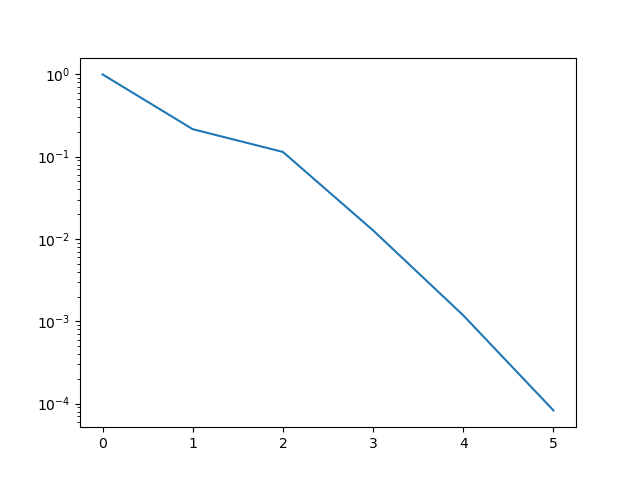

In [14]:
# This shows how to graph it
import matplotlib.pyplot as plt
%matplotlib notebook

i_reff = 20
i_wnum = 50

N_fromfortran = Npmomarray[i_reff,i_wnum]; print ("from fortran", N_fromfortran)
n_fromfortran = [i for i in range(N_fromfortran)] 
p_fromfortran = np.squeeze(pmomarray[i_reff,i_wnum,n_fromfortran])

plt.figure()
plt.semilogy(n_fromfortran,p_fromfortran)